In [6]:
''' Descriptives for Mortality Paper
'''

import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn import impute
import dbf
%matplotlib inline

## loading the data

In [2]:
os.chdir("N:/WG_ENRI/20_projects/Noise2NAKO/04_data/grid_prediction/3_output")

In [24]:
data = pd.read_csv('Merged_data.csv', sep = ',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14702 entries, 0 to 14701
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14702 non-null  object 
 1   x_sw              14702 non-null  int64  
 2   y_sw              14702 non-null  float64
 3   x_mp              14702 non-null  int64  
 4   y_mp              14702 non-null  int64  
 5   p_wasser          14702 non-null  float64
 6   ks_foreign_17     14702 non-null  float64
 7   ks_inc_hh_17      14702 non-null  float64
 8   ks_inc_17         14702 non-null  float64
 9   ks_nondipl_17     14702 non-null  float64
 10  ks_abi_17         14702 non-null  float64
 11  ks_arbl_17        14702 non-null  float64
 12  ks_Mortality_17   14702 non-null  float64
 13  ks_GISD_14        14702 non-null  float64
 14  geb_abs           14702 non-null  float64
 15  hh_abs            14702 non-null  float64
 16  pers_abs          14702 non-null  float6

In [21]:
data = data.drop(['x_sw','y_sw', 'x_mp', 'y_mp', 'p_wasser', 'ks_Mortality_17'], axis= 1)
data.describe()

,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,ks_abi_17,ks_arbl_17,ks_GISD_14,geb_abs,hh_abs,pers_abs,...,imp_pct75_18,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95,cvd_mortality_17,noise_mean_17
count,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,...,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000,14702.000000
mean,7.718934,1851.891414,2879.356951,6.690518,30.275743,4.904875,0.651457,1472.423208,2835.303156,5517.346211,...,2.916202,29.736937,31760.315828,33229.613369,34420.653721,34397.738313,35557.835567,37042.798351,4.717198,41.322344
std,3.930950,185.784461,419.235156,2.058227,7.289778,2.112402,0.157532,2191.337884,7616.712923,13252.722514,...,12.572766,35.056204,1112.291855,1223.057010,1281.063033,1098.748398,1282.662495,1165.826617,1.008253,2.400809
min,1.900000,1367.380800,2183.000000,2.100000,0.000000,1.400000,0.001496,0.000000,0.000000,0.000000,...,0.000000,0.000000,26042.000000,27089.000000,27270.000000,27747.972388,27438.000000,27851.000000,2.500000,40.000000
25%,4.200000,1696.000000,2495.000000,5.117920,26.000000,3.100000,0.545109,332.000000,362.000000,768.000000,...,0.000000,0.000000,31498.000000,32631.000000,33748.000000,33813.530813,34769.000000,36277.000000,3.961580,40.000000
50%,7.496140,1855.122600,2923.000000,6.500000,29.991140,4.751500,0.650780,719.000000,863.000000,1865.000000,...,0.000000,16.000000,31913.000000,33148.000000,34368.000000,34320.096974,35410.000000,37062.000000,4.589920,40.000000
75%,10.168720,1968.119100,3154.000000,8.300000,34.800000,6.100000,0.766778,1625.750000,2269.000000,4777.500000,...,0.000000,56.000000,32287.000000,33945.000000,35181.000000,35028.267643,36378.750000,37764.000000,5.400000,41.542420
max,33.617120,3242.000000,4628.648000,16.326880,57.900000,13.877680,1.000000,23885.000000,192005.000000,300378.000000,...,100.000000,100.000000,35225.000000,37370.000000,39412.000000,38549.906952,40402.000000,41085.000000,8.100000,60.794520


0        0.021567
1        0.002300
2        0.079733
3        0.043600
4        0.082533
           ...   
14697   -0.073333
14698   -0.064367
14699   -0.064867
14700   -0.070100
14701   -0.069967
Name: grn_pct25, Length: 14702, dtype: float64

In [15]:
data[['imp_pct05_15', 'imp_pct05_18']].describe()

,imp_pct05_15,imp_pct05_18
count,14702.0,14702.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


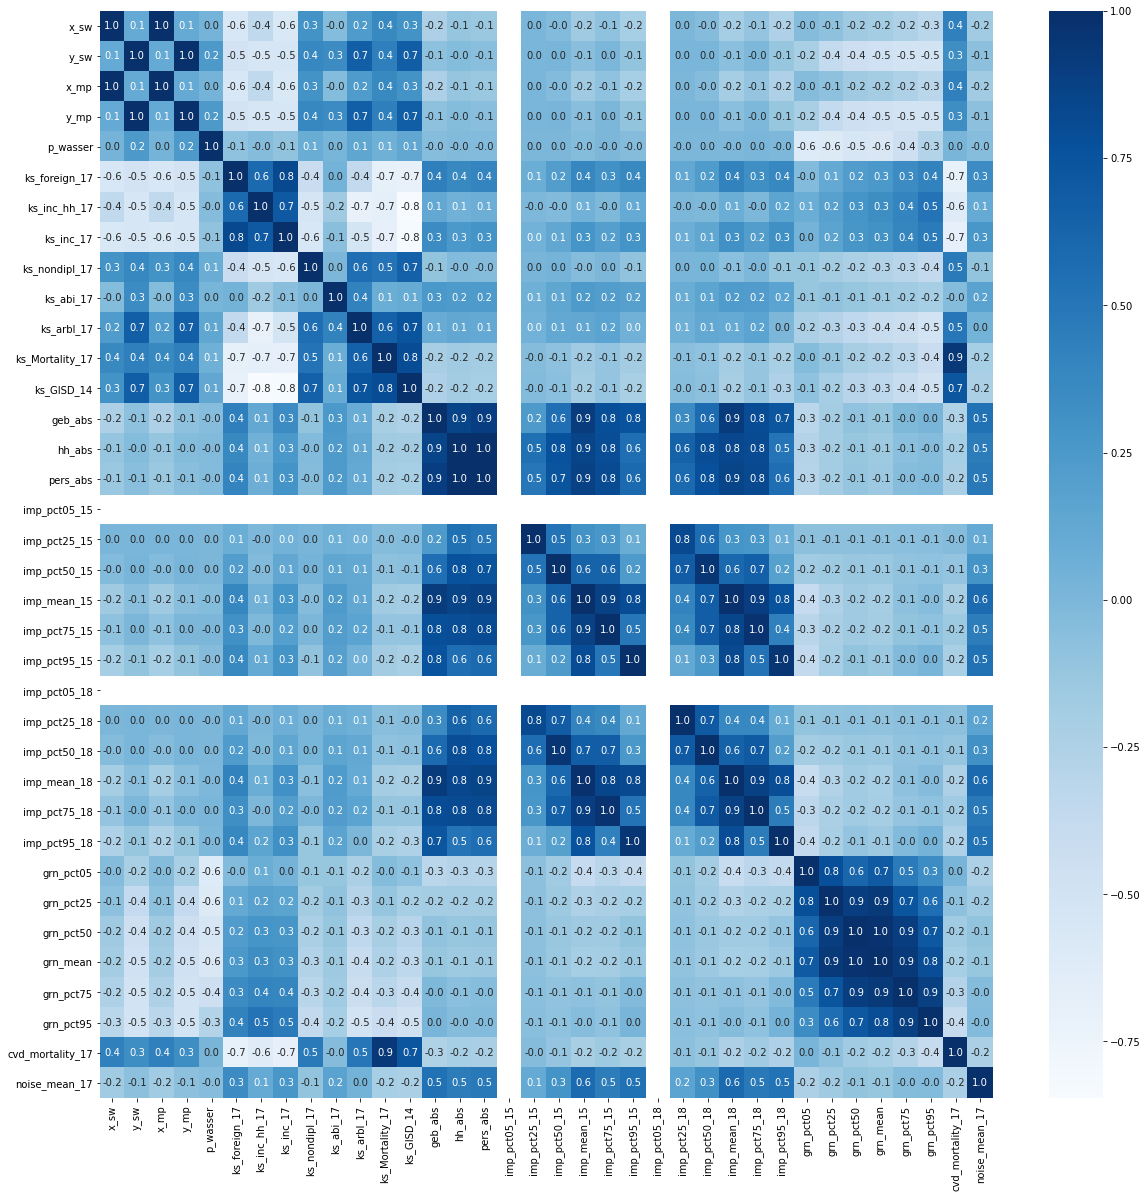

In [7]:
correlation_matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

### 
## Missing Values
### 

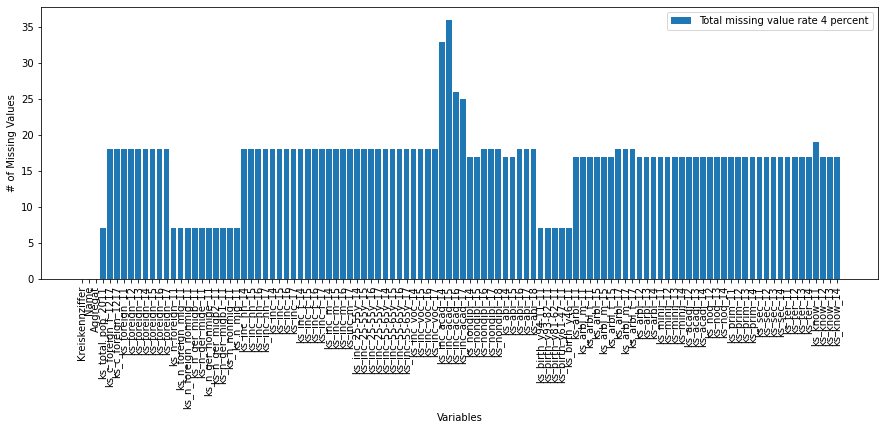

In [222]:
# show all missing values graphically
fig, ax = plt.subplots(figsize=(15,5))
#ax.bar(x, y, yerr=err)
ax.bar(data.columns,data.isna().sum())
ax.set_xlabel('Variables')
ax.set_ylabel('# of Missing Values')
plt.xticks(rotation = 'vertical')
Missing_rate = data.isna().sum().sum()/ (len(data.columns)*len(data.index) )*100
plt.legend(['Total missing value rate %.0f percent' % Missing_rate])
plt.show()


In [224]:
# Rows with 'ks_total_pop_2011' missing
data[data.ks_total_pop_2011.isna()]

,Kreiskennziffer,Name,Aggregat,ks_total_pop_2011,ks_c_foreign_f_1217,ks_c_foreign_1217,ks_foreign_11,ks_foreign_12,ks_foreign_13,ks_foreign_14,...,ks_sec_13,ks_sec_14,ks_ter_11,ks_ter_12,ks_ter_13,ks_ter_14,ks_know_11,ks_know_12,ks_know_13,ks_know_14
27,3159,Göttingen,Landkreis,NaN,-3.3,2.6,5.4,5.6,5.9,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,13071,Mecklenburgische Seenplatte,Landkreis,NaN,-4.3,1.9,1.2,1.2,1.3,1.6,...,22.6,22.2,73.3,73.4,73.8,74.0,2.3,2.4,2.1,2.1
364,13072,Landkreis Rostock,Landkreis,NaN,-2.7,1.9,1.1,1.2,1.4,1.8,...,23.6,23.3,70.6,70.6,71.7,71.9,3.7,3.8,3.8,3.6
365,13073,Vorpommern-Rügen,Landkreis,NaN,-4.0,2.7,1.0,1.2,1.5,2.1,...,17.1,15.7,79.3,79.0,79.6,80.9,2.2,2.5,0.4,0.4
366,13074,Nordwestmecklenburg,Landkreis,NaN,-2.8,1.6,1.7,1.8,1.9,2.2,...,34.2,34.5,61.3,61.6,61.9,61.7,5.6,5.6,3.8,4.0
367,13075,Vorpommern-Greifswald,Landkreis,NaN,-3.5,1.9,2.0,2.2,2.6,3.0,...,18.3,18.4,77.3,77.4,78.5,78.4,3.3,3.0,1.4,1.3
368,13076,Ludwigslust-Parchim,Landkreis,NaN,-1.0,2.8,1.6,1.9,2.4,3.0,...,33.4,33.1,59.7,59.5,60.7,60.8,4.9,5.3,5.2,5.2


In [225]:
# Name and id for the rows with 'ks_total_pop_2011' missing
data[['Kreiskennziffer', 'Name']][data['ks_total_pop_2011'].isna()]

,Kreiskennziffer,Name
27,3159,Göttingen
363,13071,Mecklenburgische Seenplatte
364,13072,Landkreis Rostock
365,13073,Vorpommern-Rügen
366,13074,Nordwestmecklenburg
367,13075,Vorpommern-Greifswald
368,13076,Ludwigslust-Parchim


In [226]:
# find missing values for SES data where ks_foreign_xx is missing
filter = (data['ks_foreign_11'].isna() | data['ks_foreign_12'].isna() | data['ks_foreign_13'].isna() | data['ks_foreign_14'].isna()) 
filter = filter | data['ks_foreign_15'].isna() | data['ks_foreign_16'].isna() | data['ks_foreign_17'].isna() 
data_missing_ks_foreign = data[['Kreiskennziffer', 'Name']][filter]
data_missing_ks_foreign.to_csv('SES_missing_ks_foreign.csv', sep = ',', index = False, encoding = "latin")
print(data_missing_ks_foreign)
data[filter].head(30)


     Kreiskennziffer                  Name
20              3152             Göttingen
24              3156      Osterode am Harz
345            13001            Greifswald
346            13002        Neubrandenburg
349            13005             Stralsund
350            13006                Wismar
351            13051           Bad Doberan
352            13052                Demmin
353            13053               Güstrow
354            13054           Ludwigslust
355            13055  Mecklenburg-Strelitz
356            13056                Müritz
357            13057        Nordvorpommern
358            13058   Nordwestmecklenburg
359            13059         Ostvorpommern
360            13060               Parchim
361            13061                 Rügen
362            13062         Uecker-Randow


,Kreiskennziffer,Name,Aggregat,ks_total_pop_2011,ks_c_foreign_f_1217,ks_c_foreign_1217,ks_foreign_11,ks_foreign_12,ks_foreign_13,ks_foreign_14,...,ks_sec_13,ks_sec_14,ks_ter_11,ks_ter_12,ks_ter_13,ks_ter_14,ks_know_11,ks_know_12,ks_know_13,ks_know_14
20,3152,Göttingen,Landkreis,246160.0,NaN,NaN,NaN,NaN,NaN,NaN,...,22.3,22.0,76.7,76.7,77.2,77.5,6.8,6.6,6.4,6.5
24,3156,Osterode am Harz,Landkreis,76160.0,NaN,NaN,NaN,NaN,NaN,NaN,...,39.1,36.7,57.1,57.6,60.4,62.8,9.5,9.6,8.9,6.4
345,13001,Greifswald,Landkreis,54740.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,13002,Neubrandenburg,Landkreis,63020.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,13005,Stralsund,Landkreis,55530.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,13006,Wismar,Landkreis,41640.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,13051,Bad Doberan,Landkreis,113870.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,13052,Demmin,Landkreis,76790.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,13053,Güstrow,Landkreis,95180.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,13054,Ludwigslust,Landkreis,118970.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
# find missing values for SES data where ks_inc_xx is missing
filter = (data['ks_inc_14'].isna() | data['ks_inc_15'].isna() | data['ks_inc_16'].isna() | data['ks_inc_17'].isna()) 
data_missing_ks_inc = data[['Kreiskennziffer', 'Name']][filter]
data_missing_ks_inc.to_csv('SES_missing_ks_inc.csv', sep = ',', index = False, encoding = "latin")
print(data_missing_ks_inc)
data[filter].head(30)

     Kreiskennziffer                  Name
20              3152             Göttingen
24              3156      Osterode am Harz
345            13001            Greifswald
346            13002        Neubrandenburg
349            13005             Stralsund
350            13006                Wismar
351            13051           Bad Doberan
352            13052                Demmin
353            13053               Güstrow
354            13054           Ludwigslust
355            13055  Mecklenburg-Strelitz
356            13056                Müritz
357            13057        Nordvorpommern
358            13058   Nordwestmecklenburg
359            13059         Ostvorpommern
360            13060               Parchim
361            13061                 Rügen
362            13062         Uecker-Randow


,Kreiskennziffer,Name,Aggregat,ks_total_pop_2011,ks_c_foreign_f_1217,ks_c_foreign_1217,ks_foreign_11,ks_foreign_12,ks_foreign_13,ks_foreign_14,...,ks_sec_13,ks_sec_14,ks_ter_11,ks_ter_12,ks_ter_13,ks_ter_14,ks_know_11,ks_know_12,ks_know_13,ks_know_14
20,3152,Göttingen,Landkreis,246160.0,NaN,NaN,NaN,NaN,NaN,NaN,...,22.3,22.0,76.7,76.7,77.2,77.5,6.8,6.6,6.4,6.5
24,3156,Osterode am Harz,Landkreis,76160.0,NaN,NaN,NaN,NaN,NaN,NaN,...,39.1,36.7,57.1,57.6,60.4,62.8,9.5,9.6,8.9,6.4
345,13001,Greifswald,Landkreis,54740.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,13002,Neubrandenburg,Landkreis,63020.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,13005,Stralsund,Landkreis,55530.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,13006,Wismar,Landkreis,41640.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,13051,Bad Doberan,Landkreis,113870.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,13052,Demmin,Landkreis,76790.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,13053,Güstrow,Landkreis,95180.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,13054,Ludwigslust,Landkreis,118970.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merge grids for Population, NAKO and SES

In [4]:
# Read the aggregated 5km SES data
data_path = 'N:\\WG_ENRI\\20_projects\\Noise2NAKO\\04_data\\grid_prediction\\3_output\\SES_reduced_5km.csv'
SES_data = pd.read_csv(data_path, encoding='Latin', sep=',')
SES_data.head()

,id,x_sw,y_sw,x_mp,y_mp,p_wasser,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,ks_abi_17,ks_arbl_17,ks_Mortality_17,ks_GISD_14
0,5kmN2680E4330,4330000,2680000.0,4332500,2682500,0.000000,8.4,2047.0,2978.0,5.0,19.4,2.4,10.3,0.501063
1,5kmN2680E4335,4335000,2680000.0,4337500,2682500,0.000000,8.4,2047.0,2978.0,5.0,19.4,2.4,10.3,0.501063
2,5kmN2685E4330,4330000,2685000.0,4332500,2687500,0.000000,8.4,2047.0,2978.0,5.0,19.4,2.4,10.3,0.501063
3,5kmN2685E4335,4335000,2685000.0,4337500,2687500,0.004788,8.4,2047.0,2978.0,5.0,19.4,2.4,10.3,0.501063
4,5kmN2685E4340,4340000,2685000.0,4342500,2687500,0.107960,8.4,2047.0,2978.0,5.0,19.4,2.4,10.3,0.501063


In [120]:
# change the type of id from object to string
SES_data.id = SES_data['id'].astype('string')
SES_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15767 entries, 0 to 15766
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15767 non-null  string 
 1   x_sw             15767 non-null  int64  
 2   y_sw             15767 non-null  float64
 3   x_mp             15767 non-null  int64  
 4   y_mp             15767 non-null  int64  
 5   p_wasser         15767 non-null  float64
 6   ks_foreign_17    14971 non-null  float64
 7   ks_inc_hh_17     14971 non-null  float64
 8   ks_inc_17        14971 non-null  float64
 9   ks_nondipl_17    14971 non-null  float64
 10  ks_abi_17        14971 non-null  float64
 11  ks_arbl_17       14971 non-null  float64
 12  ks_Mortality_17  14971 non-null  float64
 13  ks_GISD_14       14971 non-null  float64
dtypes: float64(10), int64(3), string(1)
memory usage: 1.7 MB


In [143]:
# Read the aggregated 5km population, household and buidling density
data_path = 'N:\\PROJECTS\\ENVGEO_DB\\1_GIS_data_orig\\7_demographics\\WiGeoGis\\AZDRI_2018\\Basis\\shapefiles\\azdri_basis_5k.dbf'

table = dbf.Table(filename=data_path)
table.open(dbf.READ_ONLY)
pop_data = pd.DataFrame(table)
table.close()

pop_data.head()

,0,1,2,3,4,5,6
0,5kmN2800E4560,25.0,210,220,513,20000.0,25000000.0
1,5kmN2805E4560,25.0,1078,1379,3011,20000.0,25000000.0
2,5kmN2810E4560,25.0,315,334,794,20000.0,25000000.0
3,5kmN2815E4560,25.0,544,587,1453,20000.0,25000000.0
4,5kmN2820E4560,25.0,665,701,1748,20000.0,25000000.0


In [144]:
# rename columns and drop unnecessary columns
pop_data = pop_data.rename(columns={0:'id', 1:'first', 2:'geb_abs', 3:'hh_abs', 4:'pers_abs', 5:'five', 6:'Six'})
pop_data = pop_data.drop(['first','five','Six'], axis = 1)
pop_data.head()

,id,geb_abs,hh_abs,pers_abs
0,5kmN2800E4560,210,220,513
1,5kmN2805E4560,1078,1379,3011
2,5kmN2810E4560,315,334,794
3,5kmN2815E4560,544,587,1453
4,5kmN2820E4560,665,701,1748


In [156]:
# change the type of id from object to strings and remove the spaces at the end of each id
pop_data['id'] = pop_data['id'].astype('string')
pop_data['id'] = pop_data['id'].str.strip()
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14704 entries, 0 to 14703
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        14704 non-null  string
 1   geb_abs   14704 non-null  int64 
 2   hh_abs    14704 non-null  int64 
 3   pers_abs  14704 non-null  int64 
dtypes: int64(3), string(1)
memory usage: 459.6 KB


In [173]:
# merge (left-merger) SES and population data
merged_data = pd.merge(SES_data, pop_data, on=['id'], how='left')
merged_data.head()

,id,x_sw,y_sw,x_mp,y_mp,p_wasser,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,ks_abi_17,ks_arbl_17,ks_Mortality_17,ks_GISD_14,geb_abs_x,geb_abs_y,hh_abs,pers_abs
0,5kmN2680E4330,4330000,2680000.0,4332500,2682500,0.000000,8.4,2047.0,2978.0,5.0,19.4,2.4,10.3,0.501063,1,NaN,NaN,NaN
1,5kmN2680E4335,4335000,2680000.0,4337500,2682500,0.000000,8.4,2047.0,2978.0,5.0,19.4,2.4,10.3,0.501063,1,NaN,NaN,NaN
2,5kmN2685E4330,4330000,2685000.0,4332500,2687500,0.000000,8.4,2047.0,2978.0,5.0,19.4,2.4,10.3,0.501063,1,184.0,378.0,378.0
3,5kmN2685E4335,4335000,2685000.0,4337500,2687500,0.004788,8.4,2047.0,2978.0,5.0,19.4,2.4,10.3,0.501063,1,NaN,NaN,NaN
4,5kmN2685E4340,4340000,2685000.0,4342500,2687500,0.107960,8.4,2047.0,2978.0,5.0,19.4,2.4,10.3,0.501063,1,1.0,2.0,8.0


In [186]:
# Make SES and population data by dropping cells where no population is given
merged_data = merged_data.drop(merged_data[merged_data['geb_abs'].isna()].index, axis=0)

In [193]:
# Remove the only cell where no SES data is provided for it
merged_data = merged_data.drop(merged_data[merged_data['ks_foreign_17'].isna()].index, axis=0)

In [194]:
# check if still there is any missing values
merged_data.isna().sum()

id                 0
x_sw               0
y_sw               0
x_mp               0
y_mp               0
p_wasser           0
ks_foreign_17      0
ks_inc_hh_17       0
ks_inc_17          0
ks_nondipl_17      0
ks_abi_17          0
ks_arbl_17         0
ks_Mortality_17    0
ks_GISD_14         0
geb_abs            0
hh_abs             0
pers_abs           0
dtype: int64

In [198]:
# Save the final data
merged_data.to_csv('Merged_data.csv', sep=',', index=False)

### Imperviousness 2015-2018

In [32]:
merged_data = pd.read_csv('Merged_data.csv', sep = ',')
print(merged_data.info())
imp_data = pd.read_csv('Imperviousness/imperviousness_5km_15_18.csv', sep=';')
imp_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14702 entries, 0 to 14701
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14702 non-null  object 
 1   x_sw             14702 non-null  int64  
 2   y_sw             14702 non-null  float64
 3   x_mp             14702 non-null  int64  
 4   y_mp             14702 non-null  int64  
 5   p_wasser         14702 non-null  float64
 6   ks_foreign_17    14702 non-null  float64
 7   ks_inc_hh_17     14702 non-null  float64
 8   ks_inc_17        14702 non-null  float64
 9   ks_nondipl_17    14702 non-null  float64
 10  ks_abi_17        14702 non-null  float64
 11  ks_arbl_17       14702 non-null  float64
 12  ks_Mortality_17  14702 non-null  float64
 13  ks_GISD_14       14702 non-null  float64
 14  geb_abs          14702 non-null  float64
 15  hh_abs           14702 non-null  float64
 16  pers_abs         14702 non-null  float64
dtypes: float64(1

,id,imp_pct05_15,imp_pct25_15,imp_pct50_15,imp_mean_15,imp_pct75_15,imp_pct95_15,imp_pct05_18,imp_pct25_18,imp_pct50_18,imp_mean_18,imp_pct75_18,imp_pct95_18
0,5kmN2680E4330,0,0,0.0,0.286363,0.0,0.0,0.0,0.0,0.0,0.258002,0.0,0.0
1,5kmN2680E4335,0,0,0.0,0.155808,0.0,0.0,0.0,0.0,0.0,0.225952,0.0,0.0
2,5kmN2685E4330,0,0,0.0,0.345264,0.0,0.0,0.0,0.0,0.0,0.586372,0.0,0.0
3,5kmN2685E4335,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,5kmN2685E4340,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [33]:
merged_data = pd.merge(merged_data, imp_data, on = ['id'], how= 'left')
merged_data.head()

,id,x_sw,y_sw,x_mp,y_mp,p_wasser,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,...,imp_pct50_15,imp_mean_15,imp_pct75_15,imp_pct95_15,imp_pct05_18,imp_pct25_18,imp_pct50_18,imp_mean_18,imp_pct75_18,imp_pct95_18
0,5kmN2685E4330,4330000,2685000.0,4332500,2687500,0.000000,8.4,2047.0,2978.0,5.0,...,0.0,0.345264,0.0,0.0,0.0,0.0,0.0,0.586372,0.0,0.0
1,5kmN2685E4340,4340000,2685000.0,4342500,2687500,0.107960,8.4,2047.0,2978.0,5.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,5kmN2690E4330,4330000,2690000.0,4332500,2692500,0.000000,8.4,2047.0,2978.0,5.0,...,0.0,1.301856,0.0,0.0,0.0,0.0,0.0,1.943540,0.0,0.0
3,5kmN2690E4335,4335000,2690000.0,4337500,2692500,0.078404,8.4,2047.0,2978.0,5.0,...,0.0,0.580656,0.0,0.0,0.0,0.0,0.0,0.774952,0.0,0.0
4,5kmN2690E4340,4340000,2690000.0,4342500,2692500,0.447344,8.4,2047.0,2978.0,5.0,...,0.0,0.187456,0.0,0.0,0.0,0.0,0.0,0.234108,0.0,0.0


In [34]:
# Save the final data
merged_data.to_csv('Merged_data.csv', sep=',', index=False)

### CVD Mortality Rate

In [173]:
merged_data = pd.read_csv('Merged_data.csv', sep = ',')
print(merged_data.info())
cvd_grid_data = pd.read_csv('CVD_mortality/DeStatis_Kreise_CVD_mortality_2017_5km.csv', sep=';')
cvd_grid_data = cvd_grid_data.drop(['x_sw','y_sw','x_mp','y_mp'], axis = 1)
cvd_grid_data = cvd_grid_data.rename(columns={'ks_cvd_mortality_2017':'cvd_mortality_17'})
cvd_grid_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14702 entries, 0 to 14701
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14702 non-null  object 
 1   x_sw             14702 non-null  int64  
 2   y_sw             14702 non-null  float64
 3   x_mp             14702 non-null  int64  
 4   y_mp             14702 non-null  int64  
 5   p_wasser         14702 non-null  float64
 6   ks_foreign_17    14702 non-null  float64
 7   ks_inc_hh_17     14702 non-null  float64
 8   ks_inc_17        14702 non-null  float64
 9   ks_nondipl_17    14702 non-null  float64
 10  ks_abi_17        14702 non-null  float64
 11  ks_arbl_17       14702 non-null  float64
 12  ks_Mortality_17  14702 non-null  float64
 13  ks_GISD_14       14702 non-null  float64
 14  geb_abs          14702 non-null  float64
 15  hh_abs           14702 non-null  float64
 16  pers_abs         14702 non-null  float64
 17  imp_pct05_15

,id,cvd_mortality_17
0,5kmN2680E4330,4.0
1,5kmN2680E4335,4.0
2,5kmN2685E4330,4.0
3,5kmN2685E4335,4.0
4,5kmN2685E4340,4.0


In [174]:
merged_data = pd.merge(merged_data, cvd_grid_data, on = ['id'], how= 'left')
merged_data.head()

,id,x_sw,y_sw,x_mp,y_mp,p_wasser,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,...,imp_mean_18,imp_pct75_18,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95,cvd_mortality_17
0,5kmN2685E4330,4330000,2685000.0,4332500,2687500,0.000000,8.4,2047.0,2978.0,5.0,...,0.586372,0.0,0.0,29719.0,30647.0,31885.0,32228.109228,33514.0,35936.0,4.0
1,5kmN2685E4340,4340000,2685000.0,4342500,2687500,0.107960,8.4,2047.0,2978.0,5.0,...,0.000000,0.0,0.0,29395.0,30069.0,30646.0,31107.476816,31832.0,34251.0,4.0
2,5kmN2690E4330,4330000,2690000.0,4332500,2692500,0.000000,8.4,2047.0,2978.0,5.0,...,1.943540,0.0,0.0,30552.0,32392.0,34006.0,33895.945000,35356.0,37103.0,4.0
3,5kmN2690E4335,4335000,2690000.0,4337500,2692500,0.078404,8.4,2047.0,2978.0,5.0,...,0.774952,0.0,0.0,30096.0,31308.0,32723.0,32872.678836,34266.0,36192.0,4.0
4,5kmN2690E4340,4340000,2690000.0,4342500,2692500,0.447344,8.4,2047.0,2978.0,5.0,...,0.234108,0.0,0.0,30747.0,32476.0,33821.0,33809.876408,35022.0,37076.0,4.0


In [176]:
# Save the final data
merged_data.to_csv('Merged_data.csv', sep=',', index=False)

### Greenness data June 2015 - July 2017

In [35]:
merged_data = pd.read_csv('Merged_data.csv', sep = ',')
print(merged_data.info())
grn_data = pd.read_csv('Greenness/greenness_NDVI_5km.csv', sep=';')
grn_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14702 entries, 0 to 14701
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14702 non-null  object 
 1   x_sw             14702 non-null  int64  
 2   y_sw             14702 non-null  float64
 3   x_mp             14702 non-null  int64  
 4   y_mp             14702 non-null  int64  
 5   p_wasser         14702 non-null  float64
 6   ks_foreign_17    14702 non-null  float64
 7   ks_inc_hh_17     14702 non-null  float64
 8   ks_inc_17        14702 non-null  float64
 9   ks_nondipl_17    14702 non-null  float64
 10  ks_abi_17        14702 non-null  float64
 11  ks_arbl_17       14702 non-null  float64
 12  ks_Mortality_17  14702 non-null  float64
 13  ks_GISD_14       14702 non-null  float64
 14  geb_abs          14702 non-null  float64
 15  hh_abs           14702 non-null  float64
 16  pers_abs         14702 non-null  float64
 17  imp_pct05_15

,id,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95
0,5kmN2680E4330,29967.0,30917.0,32357.0,32521.502644,33907.0,35780.0
1,5kmN2680E4335,29805.0,30718.0,32241.0,32617.298240,34395.0,36310.0
2,5kmN2685E4330,29719.0,30647.0,31885.0,32228.109228,33514.0,35936.0
3,5kmN2685E4335,29769.0,30500.0,31572.0,32127.249012,33612.0,35815.0
4,5kmN2685E4340,29395.0,30069.0,30646.0,31107.476816,31832.0,34251.0


In [36]:
merged_data = pd.merge(merged_data, grn_data, on = ['id'], how= 'left')
merged_data.head()

,id,x_sw,y_sw,x_mp,y_mp,p_wasser,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,...,imp_pct50_18,imp_mean_18,imp_pct75_18,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95
0,5kmN2685E4330,4330000,2685000.0,4332500,2687500,0.000000,8.4,2047.0,2978.0,5.0,...,0.0,0.586372,0.0,0.0,29719.0,30647.0,31885.0,32228.109228,33514.0,35936.0
1,5kmN2685E4340,4340000,2685000.0,4342500,2687500,0.107960,8.4,2047.0,2978.0,5.0,...,0.0,0.000000,0.0,0.0,29395.0,30069.0,30646.0,31107.476816,31832.0,34251.0
2,5kmN2690E4330,4330000,2690000.0,4332500,2692500,0.000000,8.4,2047.0,2978.0,5.0,...,0.0,1.943540,0.0,0.0,30552.0,32392.0,34006.0,33895.945000,35356.0,37103.0
3,5kmN2690E4335,4335000,2690000.0,4337500,2692500,0.078404,8.4,2047.0,2978.0,5.0,...,0.0,0.774952,0.0,0.0,30096.0,31308.0,32723.0,32872.678836,34266.0,36192.0
4,5kmN2690E4340,4340000,2690000.0,4342500,2692500,0.447344,8.4,2047.0,2978.0,5.0,...,0.0,0.234108,0.0,0.0,30747.0,32476.0,33821.0,33809.876408,35022.0,37076.0


In [37]:
# Save the final data
merged_data.to_csv('Merged_data.csv', sep=',', index=False)

### Noise Data

In [188]:
merged_data = pd.read_csv('Merged_data.csv', sep = ',')
print(merged_data.info())
noise_data = pd.read_csv('Noise/NOISE_LDEN2017_Germany_BKG25STA_5km_cutoff40.csv', sep=';')
noise_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14702 entries, 0 to 14701
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14702 non-null  object 
 1   x_sw              14702 non-null  int64  
 2   y_sw              14702 non-null  float64
 3   x_mp              14702 non-null  int64  
 4   y_mp              14702 non-null  int64  
 5   p_wasser          14702 non-null  float64
 6   ks_foreign_17     14702 non-null  float64
 7   ks_inc_hh_17      14702 non-null  float64
 8   ks_inc_17         14702 non-null  float64
 9   ks_nondipl_17     14702 non-null  float64
 10  ks_abi_17         14702 non-null  float64
 11  ks_arbl_17        14702 non-null  float64
 12  ks_Mortality_17   14702 non-null  float64
 13  ks_GISD_14        14702 non-null  float64
 14  geb_abs           14702 non-null  float64
 15  hh_abs            14702 non-null  float64
 16  pers_abs          14702 non-null  float6

,id,noise_mean_17
0,5kmN2680E4330,40.0
1,5kmN2680E4335,40.0
2,5kmN2685E4330,40.0
3,5kmN2685E4335,40.0
4,5kmN2685E4340,40.0


In [189]:
merged_data = pd.merge(merged_data, noise_data, on = ['id'], how= 'left')
merged_data.head()

,id,x_sw,y_sw,x_mp,y_mp,p_wasser,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,...,imp_pct75_18,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95,cvd_mortality_17,noise_mean_17
0,5kmN2685E4330,4330000,2685000.0,4332500,2687500,0.000000,8.4,2047.0,2978.0,5.0,...,0.0,0.0,29719.0,30647.0,31885.0,32228.109228,33514.0,35936.0,4.0,40.0
1,5kmN2685E4340,4340000,2685000.0,4342500,2687500,0.107960,8.4,2047.0,2978.0,5.0,...,0.0,0.0,29395.0,30069.0,30646.0,31107.476816,31832.0,34251.0,4.0,40.0
2,5kmN2690E4330,4330000,2690000.0,4332500,2692500,0.000000,8.4,2047.0,2978.0,5.0,...,0.0,0.0,30552.0,32392.0,34006.0,33895.945000,35356.0,37103.0,4.0,40.0
3,5kmN2690E4335,4335000,2690000.0,4337500,2692500,0.078404,8.4,2047.0,2978.0,5.0,...,0.0,0.0,30096.0,31308.0,32723.0,32872.678836,34266.0,36192.0,4.0,40.0
4,5kmN2690E4340,4340000,2690000.0,4342500,2692500,0.447344,8.4,2047.0,2978.0,5.0,...,0.0,0.0,30747.0,32476.0,33821.0,33809.876408,35022.0,37076.0,4.0,40.0


In [190]:
# Save the merged data
merged_data.to_csv('Merged_data_noise.csv', sep=',', index=False)

### NAKO Participants

In [193]:
# Read the aggregated 5km NAKO data to find cells with NAKO participants
NAKO_data_path = 'N:\\WG_ENRI\\20_projects\\Noise2NAKO\\03_fieldwork\\NAKO grid prediction\\NAKO_TN_INSPIRE_5km_2021_EMA.xlsx'
NAKO_data = pd.read_excel(NAKO_data_path)
NAKO_data.head()

,id,n_particip
0,5kmN3265E4545,4634.0
1,5kmN3205E4155,3735.0
2,5kmN3385E4535,3681.0
3,5kmN2930E4210,3622.0
4,5kmN3250E4300,3553.0


In [194]:
# convert the data type from object to string
NAKO_data.id = NAKO_data.id.astype('string')
NAKO_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15767 entries, 0 to 15766
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15767 non-null  string 
 1   n_particip  858 non-null    float64
dtypes: float64(1), string(1)
memory usage: 246.5 KB


In [205]:
merged_data = pd.read_csv('Merged_data.csv', sep = ',')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14702 entries, 0 to 14701
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14702 non-null  object 
 1   x_sw              14702 non-null  int64  
 2   y_sw              14702 non-null  float64
 3   x_mp              14702 non-null  int64  
 4   y_mp              14702 non-null  int64  
 5   p_wasser          14702 non-null  float64
 6   ks_foreign_17     14702 non-null  float64
 7   ks_inc_hh_17      14702 non-null  float64
 8   ks_inc_17         14702 non-null  float64
 9   ks_nondipl_17     14702 non-null  float64
 10  ks_abi_17         14702 non-null  float64
 11  ks_arbl_17        14702 non-null  float64
 12  ks_Mortality_17   14702 non-null  float64
 13  ks_GISD_14        14702 non-null  float64
 14  geb_abs           14702 non-null  float64
 15  hh_abs            14702 non-null  float64
 16  pers_abs          14702 non-null  float6

In [206]:
# Merge (left-merge) SES data and NAKO to make training and test data
merged_data = pd.merge(merged_data, NAKO_data, on = ['id'], how = 'left')
merged_data.head()

,id,x_sw,y_sw,x_mp,y_mp,p_wasser,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,...,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95,cvd_mortality_17,noise_mean_17,n_particip
0,5kmN2685E4330,4330000,2685000.0,4332500,2687500,0.000000,8.4,2047.0,2978.0,5.0,...,0.0,29719.0,30647.0,31885.0,32228.109228,33514.0,35936.0,4.0,40.0,NaN
1,5kmN2685E4340,4340000,2685000.0,4342500,2687500,0.107960,8.4,2047.0,2978.0,5.0,...,0.0,29395.0,30069.0,30646.0,31107.476816,31832.0,34251.0,4.0,40.0,NaN
2,5kmN2690E4330,4330000,2690000.0,4332500,2692500,0.000000,8.4,2047.0,2978.0,5.0,...,0.0,30552.0,32392.0,34006.0,33895.945000,35356.0,37103.0,4.0,40.0,NaN
3,5kmN2690E4335,4335000,2690000.0,4337500,2692500,0.078404,8.4,2047.0,2978.0,5.0,...,0.0,30096.0,31308.0,32723.0,32872.678836,34266.0,36192.0,4.0,40.0,NaN
4,5kmN2690E4340,4340000,2690000.0,4342500,2692500,0.447344,8.4,2047.0,2978.0,5.0,...,0.0,30747.0,32476.0,33821.0,33809.876408,35022.0,37076.0,4.0,40.0,NaN


### Training and test data for the prediction task

In [207]:
# Make training data out of merged data by considering the cells where number of participants is not null
training_data = merged_data[merged_data['n_particip'].isna() == False]
training_data.head()

,id,x_sw,y_sw,x_mp,y_mp,p_wasser,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,...,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95,cvd_mortality_17,noise_mean_17,n_particip
711,5kmN2760E4145,4145000,2760000.0,4147500,2762500,0.086200,12.6142,2014.588,3156.994,7.71136,...,70.0,31425.0,31924.0,32459.0,33137.647964,33708.0,37025.0,3.08936,47.18114,87.0
713,5kmN2760E4155,4155000,2760000.0,4157500,2762500,0.051884,12.6252,2014.128,3157.764,7.72016,...,57.0,32490.0,35027.0,36236.0,35919.512908,37140.0,38161.0,3.08816,40.56538,298.0
714,5kmN2760E4160,4160000,2760000.0,4162500,2762500,0.020276,15.9582,1874.748,3391.074,10.38656,...,18.0,32895.0,34366.0,35475.0,35407.253556,36473.0,37789.0,2.72456,40.39350,199.0
715,5kmN2760E4165,4165000,2760000.0,4167500,2762500,0.161740,12.2930,2028.020,3134.510,7.45440,...,56.0,32285.0,34035.0,35604.0,35532.684820,37083.0,38642.0,3.12440,42.28186,35.0
792,5kmN2765E4145,4145000,2765000.0,4147500,2767500,2.055644,13.3072,1985.608,3205.504,8.26576,...,53.0,31292.0,32325.0,34787.0,34280.013860,36185.0,37165.0,3.01376,40.51150,12.0


In [208]:
# Drop unnecessary features
training_data = training_data.drop(['n_particip','p_wasser'], axis = 1)
training_data.head()

,id,x_sw,y_sw,x_mp,y_mp,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,ks_abi_17,...,imp_pct75_18,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95,cvd_mortality_17,noise_mean_17
711,5kmN2760E4145,4145000,2760000.0,4147500,2762500,12.6142,2014.588,3156.994,7.71136,34.84684,...,0.0,70.0,31425.0,31924.0,32459.0,33137.647964,33708.0,37025.0,3.08936,47.18114
713,5kmN2760E4155,4155000,2760000.0,4157500,2762500,12.6252,2014.128,3157.764,7.72016,34.86904,...,0.0,57.0,32490.0,35027.0,36236.0,35919.512908,37140.0,38161.0,3.08816,40.56538
714,5kmN2760E4160,4160000,2760000.0,4162500,2762500,15.9582,1874.748,3391.074,10.38656,41.59564,...,0.0,18.0,32895.0,34366.0,35475.0,35407.253556,36473.0,37789.0,2.72456,40.39350
715,5kmN2760E4165,4165000,2760000.0,4167500,2762500,12.2930,2028.020,3134.510,7.45440,34.19860,...,0.0,56.0,32285.0,34035.0,35604.0,35532.684820,37083.0,38642.0,3.12440,42.28186
792,5kmN2765E4145,4145000,2765000.0,4147500,2767500,13.3072,1985.608,3205.504,8.26576,36.24544,...,0.0,53.0,31292.0,32325.0,34787.0,34280.013860,36185.0,37165.0,3.01376,40.51150


In [209]:
# Save training data
training_data.to_csv('Prediction/Training_data_cvd_noise.csv', sep=',', index=False)

In [210]:
# Make test data out of SES_data by considering the cells where number of participants is null
test_data = merged_data[merged_data['n_particip'].isna()]
test_data.head()

,id,x_sw,y_sw,x_mp,y_mp,p_wasser,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,...,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95,cvd_mortality_17,noise_mean_17,n_particip
0,5kmN2685E4330,4330000,2685000.0,4332500,2687500,0.000000,8.4,2047.0,2978.0,5.0,...,0.0,29719.0,30647.0,31885.0,32228.109228,33514.0,35936.0,4.0,40.0,NaN
1,5kmN2685E4340,4340000,2685000.0,4342500,2687500,0.107960,8.4,2047.0,2978.0,5.0,...,0.0,29395.0,30069.0,30646.0,31107.476816,31832.0,34251.0,4.0,40.0,NaN
2,5kmN2690E4330,4330000,2690000.0,4332500,2692500,0.000000,8.4,2047.0,2978.0,5.0,...,0.0,30552.0,32392.0,34006.0,33895.945000,35356.0,37103.0,4.0,40.0,NaN
3,5kmN2690E4335,4335000,2690000.0,4337500,2692500,0.078404,8.4,2047.0,2978.0,5.0,...,0.0,30096.0,31308.0,32723.0,32872.678836,34266.0,36192.0,4.0,40.0,NaN
4,5kmN2690E4340,4340000,2690000.0,4342500,2692500,0.447344,8.4,2047.0,2978.0,5.0,...,0.0,30747.0,32476.0,33821.0,33809.876408,35022.0,37076.0,4.0,40.0,NaN


In [211]:
# Drop unnecessary features
test_data = test_data.drop(['n_particip','p_wasser'], axis = 1)
test_data.head()

,id,x_sw,y_sw,x_mp,y_mp,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,ks_abi_17,...,imp_pct75_18,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95,cvd_mortality_17,noise_mean_17
0,5kmN2685E4330,4330000,2685000.0,4332500,2687500,8.4,2047.0,2978.0,5.0,19.4,...,0.0,0.0,29719.0,30647.0,31885.0,32228.109228,33514.0,35936.0,4.0,40.0
1,5kmN2685E4340,4340000,2685000.0,4342500,2687500,8.4,2047.0,2978.0,5.0,19.4,...,0.0,0.0,29395.0,30069.0,30646.0,31107.476816,31832.0,34251.0,4.0,40.0
2,5kmN2690E4330,4330000,2690000.0,4332500,2692500,8.4,2047.0,2978.0,5.0,19.4,...,0.0,0.0,30552.0,32392.0,34006.0,33895.945000,35356.0,37103.0,4.0,40.0
3,5kmN2690E4335,4335000,2690000.0,4337500,2692500,8.4,2047.0,2978.0,5.0,19.4,...,0.0,0.0,30096.0,31308.0,32723.0,32872.678836,34266.0,36192.0,4.0,40.0
4,5kmN2690E4340,4340000,2690000.0,4342500,2692500,8.4,2047.0,2978.0,5.0,19.4,...,0.0,0.0,30747.0,32476.0,33821.0,33809.876408,35022.0,37076.0,4.0,40.0


In [212]:
# Save test data
test_data.to_csv('Prediction/Test_data_cvd_noise.csv', sep=',', index=False)

### Preparing CVD mortality data

In [29]:
NAKO_data_path = 'N:\\WG_ENRI\\20_projects\\Noise2NAKO\\03_fieldwork\\NAKO grid prediction\\NAKO_TN_INSPIRE_5km_2021_EMA.xlsx'
NAKO_data = pd.read_excel(NAKO_data_path)
NAKO_data.head()

,id,n_particip
0,5kmN3265E4545,4634.0
1,5kmN3205E4155,3735.0
2,5kmN3385E4535,3681.0
3,5kmN2930E4210,3622.0
4,5kmN3250E4300,3553.0


In [7]:
cvd_data_path = 'N:\\WG_ENRI\\20_projects\\Noise2NAKO\\03_fieldwork\\NAKO grid prediction\\Durchschnittliche Jahresbevoelkerung nach Geschlecht_Jahresdurchschnitt_regionale Tiefe Kreise und krfr Staedte_2017_Edit.xlsx'
cvd_mortality_data = pd.read_excel(cvd_data_path)
cvd_mortality_data.head()

,NKennzieferame,Name,Insgesamt,männlich,weiblich
0,1,Schleswig-Holstein,2885874,1414600,1471274
1,1001,"Flensburg, kreisfreie Stadt",87976,43852,44124
2,1002,"Kiel, Landeshauptstadt, kreisfreie Stadt",247692,120641,127051
3,1003,"Lübeck, Hansestadt, kreisfreie Stadt",216515,103903,112613
4,1004,"Neumünster, kreisfreie Stadt",79508,39314,40194


### CVD Mortality Bavaria

In [27]:
# Load the data
cvd_Bayern_data_path = 'N:\\WG_ENRI\\20_projects\\Noise2NAKO\\03_fieldwork\\NAKO grid prediction\\Helmholtz_Kapitel_I__final_2021_11_25_Edit.xlsx'
cvd_mortality_Bayern_data = pd.read_excel(cvd_Bayern_data_path, header= None, sheet_name = 'Zeitreihe-Geschlecht' )

# drop data for 20xx, xx=20,19,18,16
cvd_mortality_Bayern_data = cvd_mortality_Bayern_data.drop([1,2,3,4,5,6,7,8,9,13,14,15], axis=1)

# rename columns
cvd_mortality_Bayern_data = cvd_mortality_Bayern_data.rename(columns = {0:'Kennziefer', 10:'männlich', 11:'weiblich', 12:'Insgesamt'})

cvd_mortality_Bayern_data.head()

,Kennziefer,männlich,weiblich,Insgesamt
0,161,194,214,408
1,162,1716,2087,3803
2,163,90,134,224
3,171,178,248,426
4,172,196,231,427


In [28]:
cvd_mortality_Bayern_data['Kennziefer'] = '09' + cvd_mortality_Bayern_data['Kennziefer'].astype(str)
cvd_mortality_Bayern_data.head()

,Kennziefer,männlich,weiblich,Insgesamt
0,09161,194,214,408
1,09162,1716,2087,3803
2,09163,90,134,224
3,09171,178,248,426
4,09172,196,231,427


In [32]:
cvd_mortality_Bayern_data.to_excel('CVD_Bayern_2017.xlsx', index = False)
cvd_mortality_Bayern_data.to_csv('CVD_Bayern_2017.csv', sep = ',', index = False)

### CVD Mortality all counties

In [81]:
cvd_data_path = 'N:\\WG_ENRI\\20_projects\\Noise2NAKO\\03_fieldwork\\NAKO grid prediction\\Regionalstatistik_Kreise_CVDmortality_2017_noMissing.xlsx'
cvd_data = pd.read_excel(cvd_data_path)
cvd_data.head()

,Kennziffer,Raumeinheit,CVD
0,1,Schleswig-Holstein,12622
1,1001,"Flensburg, kreisfreie Stadt",362
2,1002,"Kiel, Landeshauptstadt, kreisfreie Stadt",929
3,1003,"Lübeck, Hansestadt, kreisfreie Stadt",907
4,1004,"Neumünster, kreisfreie Stadt",479


In [82]:
cvd_data_INKAR_path = 'N:\\WG_ENRI\\20_projects\\Noise2NAKO\\03_fieldwork\\NAKO grid prediction\\INKAR_Kreise_mortality_Edit.xlsx'
cvd_data_INKAR = pd.read_excel(cvd_data_INKAR_path)
cvd_data_INKAR.head()

,Kennziffer,Raumeinheit,Aggregat,Gestorbene(2017)
0,1001,"Flensburg, Stadt",krsfr. Stadt,11.7
1,1002,"Kiel, Stadt",krsfr. Stadt,10.0
2,1003,"Lübeck, Stadt",krsfr. Stadt,12.7
3,1004,"Neumünster, Stadt",krsfr. Stadt,14.4
4,1051,Dithmarschen,Landkreis,13.3


In [94]:
cvd_data[cvd_data['Kennziffer'].isin(cvd_data_INKAR['Kennziffer']) == False]

,Kennziffer,Raumeinheit,CVD


In [95]:
cvd_data_INKAR[cvd_data_INKAR['Kennziffer'].isin(cvd_data['Kennziffer']) == False]

,Kennziffer,Raumeinheit,Aggregat,Gestorbene(2017)


In [88]:
cvd_data[cvd_data['Kennziffer']<1000].index

Int64Index([  0,  17,  18,  29,  38,  50,  68,  71,  72,  88, 101, 110, 118,
            131, 132, 147, 153, 161, 162, 174, 180, 201, 202, 216, 229, 240,
            250, 251, 275, 288, 299, 313, 326, 339, 354, 362, 381, 390, 391,
            397, 403, 407, 422],
           dtype='int64')

In [90]:
cvd_data.info()
cvd_data = cvd_data.drop(cvd_data[cvd_data['Kennziffer']<1000].index, axis = 0)
cvd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Kennziffer   446 non-null    int64 
 1   Raumeinheit  446 non-null    object
 2   CVD          446 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 1 to 445
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Kennziffer   403 non-null    int64 
 1   Raumeinheit  403 non-null    object
 2   CVD          403 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.6+ KB


In [93]:
cvd_data.info()
cvd_data = cvd_data.drop(cvd_data[cvd_data['Kennziffer'].isin(cvd_data_INKAR['Kennziffer']) == False].index, axis = 0)
cvd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 1 to 445
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Kennziffer   403 non-null    int64 
 1   Raumeinheit  403 non-null    object
 2   CVD          403 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 1 to 445
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Kennziffer   401 non-null    int64 
 1   Raumeinheit  401 non-null    object
 2   CVD          401 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.5+ KB


In [96]:
cvd_data

,Kennziffer,Raumeinheit,CVD
1,1001,"Flensburg, kreisfreie Stadt",362
2,1002,"Kiel, Landeshauptstadt, kreisfreie Stadt",929
3,1003,"Lübeck, Hansestadt, kreisfreie Stadt",907
4,1004,"Neumünster, kreisfreie Stadt",479
5,1051,"Dithmarschen, Landkreis",720
...,...,...,...
441,16073,"Saalfeld-Rudolstadt, Kreis",788
442,16074,Saale-Holzland-Kreis,396
443,16075,Saale-Orla-Kreis,587
444,16076,"Greiz, Kreis",564


In [98]:
cvd_data.to_excel('Regionalstatistik_Kreise_CVDmortality_2017_final.xlsx', index = False)

### Computing CVD mortality rate

In [111]:
# load the population data
pop_data_DeStatis_path = 'N:\\WG_ENRI\\20_projects\\Noise2NAKO\\03_fieldwork\\NAKO grid prediction\\Durchschnittliche Jahresbevoelkerung nach Geschlecht_Jahresdurchschnitt_regionale Tiefe Kreise und krfr Staedte_2017_Edit.xlsx'
pop_data_DeStatis = pd.read_excel(pop_data_DeStatis_path)
pop_data_DeStatis.head()

,Kennziffer,Name,Insgesamt,männlich,weiblich
0,1,Schleswig-Holstein,2885874,1414600,1471274
1,1001,"Flensburg, kreisfreie Stadt",87976,43852,44124
2,1002,"Kiel, Landeshauptstadt, kreisfreie Stadt",247692,120641,127051
3,1003,"Lübeck, Hansestadt, kreisfreie Stadt",216515,103903,112613
4,1004,"Neumünster, kreisfreie Stadt",79508,39314,40194


In [112]:
pop_data_DeStatis = pop_data_DeStatis.drop(['männlich', 'weiblich'], axis = 1)
pop_data_DeStatis.head()

,Kennziffer,Name,Insgesamt
0,1,Schleswig-Holstein,2885874
1,1001,"Flensburg, kreisfreie Stadt",87976
2,1002,"Kiel, Landeshauptstadt, kreisfreie Stadt",247692
3,1003,"Lübeck, Hansestadt, kreisfreie Stadt",216515
4,1004,"Neumünster, kreisfreie Stadt",79508


In [120]:
pop_data_DeStatis[pop_data_DeStatis['Kennziffer'].isin(cvd_data_INKAR['Kennziffer']) == False].index

Int64Index([  0,  17,  18,  23,  27,  31,  33,  40,  52,  70,
            ...
            504, 505, 506, 507, 508, 509, 510, 511, 512, 513],
           dtype='int64', length=136)

In [114]:
cvd_data_INKAR[cvd_data_INKAR['Kennziffer'].isin(pop_data_DeStatis['Kennziffer']) == False]

,Kennziffer,Raumeinheit,Aggregat,Gestorbene(2017)


In [116]:
pop_data_DeStatis[pop_data_DeStatis['Insgesamt']=='-']

,Kennziffer,Name,Insgesamt
23,3152,"Göttingen, Landkreis",-
27,3156,"Osterode am Harz, Landkreis",-
96,5354,"Aachen, Kreis",-
398,13001,"Kreisfreie Stadt Greifswald, Hansestadt",-
399,13002,"Kreisfreie Stadt Neubrandenburg, Stadt",-
...,...,...,...
508,15363,"Stendal, Kreis",-
509,15364,"Quedlinburg, Kreis",-
510,15367,"Schönebeck, Kreis",-
511,15369,"Wernigerode, Kreis",-


In [121]:
pop_data_DeStatis = pop_data_DeStatis.drop(pop_data_DeStatis[pop_data_DeStatis['Kennziffer'].isin(cvd_data_INKAR['Kennziffer']) == False].index, axis = 0)
pop_data_DeStatis.head()

,Kennziffer,Name,Insgesamt
1,1001,"Flensburg, kreisfreie Stadt",87976
2,1002,"Kiel, Landeshauptstadt, kreisfreie Stadt",247692
3,1003,"Lübeck, Hansestadt, kreisfreie Stadt",216515
4,1004,"Neumünster, kreisfreie Stadt",79508
5,1051,"Dithmarschen, Landkreis",133504


In [122]:
# after removing unmatching Kennziffer
pop_data_DeStatis[pop_data_DeStatis['Kennziffer'].isin(cvd_data_INKAR['Kennziffer']) == False]

,Kennziffer,Name,Insgesamt


In [129]:
# after removing unmatching Kennziffer
pop_data_DeStatis[pop_data_DeStatis['Insgesamt']=='-']

,Kennziffer,Name,Insgesamt


In [128]:
pop_data_DeStatis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 1 to 536
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Kennziffer  401 non-null    int64 
 1   Name        401 non-null    object
 2   Insgesamt   401 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.5+ KB


In [126]:
pop_data_DeStatis.to_excel('Durchschnittliche Jahresbevoelkerung nach Geschlecht_Jahresdurchschnitt_regionale Tiefe Kreise und krfr Staedte_2017_final.xlsx', index=False)

In [131]:
cvd_data.head()

,Kennziffer,Raumeinheit,CVD
1,1001,"Flensburg, kreisfreie Stadt",362
2,1002,"Kiel, Landeshauptstadt, kreisfreie Stadt",929
3,1003,"Lübeck, Hansestadt, kreisfreie Stadt",907
4,1004,"Neumünster, kreisfreie Stadt",479
5,1051,"Dithmarschen, Landkreis",720


In [156]:
cvd_merged_data = pd.merge(cvd_data, pop_data_DeStatis, on = ['Kennziffer'], how = 'left')
cvd_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 400
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Kennziffer   401 non-null    int64 
 1   Raumeinheit  401 non-null    object
 2   CVD          401 non-null    int64 
 3   Name         401 non-null    object
 4   Insgesamt    401 non-null    object
dtypes: int64(2), object(3)
memory usage: 18.8+ KB


In [157]:
cvd_merged_data = cvd_merged_data.drop(['Name'], axis = 1)
cvd_merged_data = cvd_merged_data.rename(columns = {'Insgesamt':'population'})

In [158]:
cvd_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 400
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Kennziffer   401 non-null    int64 
 1   Raumeinheit  401 non-null    object
 2   CVD          401 non-null    int64 
 3   population   401 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.7+ KB


In [159]:
# compute the cvd mortality rate for counties = (number of deaths per county/population of the county) * 100,000
cvd_merged_data['rate'] = ((cvd_merged_data['CVD']/cvd_merged_data['population'])*1000).apply(lambda x: round(x, 1))
cvd_merged_data.head(10)

,Kennziffer,Raumeinheit,CVD,population,rate
0,1001,"Flensburg, kreisfreie Stadt",362,87976,4.1
1,1002,"Kiel, Landeshauptstadt, kreisfreie Stadt",929,247692,3.8
2,1003,"Lübeck, Hansestadt, kreisfreie Stadt",907,216515,4.2
3,1004,"Neumünster, kreisfreie Stadt",479,79508,6.0
4,1051,"Dithmarschen, Landkreis",720,133504,5.4
5,1053,"Herzogtum Lauenburg, Landkreis",891,195569,4.6
6,1054,"Nordfriesland, Landkreis",701,165194,4.2
7,1055,"Ostholstein, Landkreis",1028,200699,5.1
8,1056,"Pinneberg, Landkreis",1196,311658,3.8
9,1057,"Plön, Landkreis",562,128773,4.4


In [163]:
cvd_merged_data.to_excel('DeStatis_Kreise_CVD_mortality_2017.xlsx', index=False)
cvd_merged_data.to_csv('DeStatis_Kreise_CVD_mortality_2017.csv', index=False, sep=',', encoding='Latin')